In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from yahooquery import Ticker

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [3]:
company = ["PETR4.SA","^BVSP","BRL=X"]
df = Ticker(company)

In [4]:
pd.DataFrame(df.summary_detail)

,PETR4.SA,^BVSP,BRL=X
maxAge,1,1,1
priceHint,2,2,4
previousClose,23.28,114019,5.585
open,0,0,5.585
dayLow,0,113428,5.5747
dayHigh,0,116736,5.5862
regularMarketPreviousClose,23.28,114019,5.585
regularMarketOpen,0,0,5.585
regularMarketDayLow,0,113428,5.5747
regularMarketDayHigh,0,116736,5.5862


In [46]:
#specific time
time = df.history(start='2021-01-01', end="2021-03-18")
time.head()

low   high      volume      close       open  \
symbol   date                                                             
PETR4.SA 2021-01-04  28.530001  29.18  74719700.0  28.910000  28.650000   
         2021-01-05  28.240000  30.18  95181100.0  30.040001  28.900000   
         2021-01-06  30.049999  30.90  96562500.0  30.100000  30.160000   
         2021-01-07  30.340000  31.15  56171300.0  31.000000  30.340000   
         2021-01-08  30.350000  31.76  67136300.0  31.120001  31.459999   

                      adjclose  
symbol   date                   
PETR4.SA 2021-01-04  28.910000  
         2021-01-05  30.040001  
         2021-01-06  30.100000  
         2021-01-07  31.000000  
         2021-01-08  31.120001

In [47]:
time = time.reset_index()

In [48]:
time['symbol'].unique()

array(['PETR4.SA', '^BVSP', 'BRL=X'], dtype=object)

In [49]:
time = time.drop('adjclose',axis=1)
df_1 = time.loc[time['symbol'] == time['symbol'].unique()[0]]
df_1 = df_1.set_index('date')
df_1.columns = df_1.columns.values + '-' + df_1.symbol.unique() 
df_1.drop(df_1.columns[0],axis=1,inplace=True)
df_2 = time.loc[time['symbol'] == time['symbol'].unique()[1]]
df_2 = df_2.set_index('date')
df_2.columns = df_2.columns.values + '-' + df_2.symbol.unique() 
df_2.drop(df_2.columns[0],axis=1,inplace=True)
df_3 = time.loc[time['symbol'] == time['symbol'].unique()[2]]
df_3 = df_3.set_index('date')
df_3.columns = df_3.columns.values + '-' + df_3.symbol.unique() 
df_3.drop(df_3.columns[0],axis=1,inplace=True)

In [50]:
merged = pd.merge(pd.merge(df_1,df_2,left_on=df_1.index,right_on=df_2.index,how='left'),df_3,left_on='key_0',right_on=df_3.index,how='left').rename({'key_0':'date'},axis=1).set_index('date')
merged = merged.drop('volume-BRL=X',axis=1)

In [51]:
merged.head()

,low-PETR4.SA,high-PETR4.SA,volume-PETR4.SA,close-PETR4.SA,open-PETR4.SA,low-^BVSP,high-^BVSP,volume-^BVSP,close-^BVSP,open-^BVSP,low-BRL=X,high-BRL=X,close-BRL=X,open-BRL=X
date,,,,,,,,,,,,,,
2021-01-04,28.530001,29.18,74719700.0,28.910000,28.650000,118062.0,120354.0,8741400.0,118558.0,119024.0,5.116400,5.252800,5.1919,5.1728
2021-01-05,28.240000,30.18,95181100.0,30.040001,28.900000,116756.0,119790.0,9257100.0,119223.0,118835.0,5.274600,5.350300,5.2953,5.2950
2021-01-06,30.049999,30.90,96562500.0,30.100000,30.160000,118917.0,120924.0,11638200.0,119851.0,119377.0,5.231207,5.346680,5.2841,5.2845
2021-01-07,30.340000,31.15,56171300.0,31.000000,30.340000,119101.0,121983.0,11774800.0,121956.0,119103.0,5.296700,5.405568,5.3129,5.3133
2021-01-08,30.350000,31.76,67136300.0,31.120001,31.459999,122386.0,125324.0,11085800.0,125077.0,122387.0,5.320400,5.411400,5.4088,5.4087


# Plots

In [52]:
# Create traces
merged['compra'] = 23
layout = go.Layout(title="Resultados",xaxis=dict(title="Data"), yaxis=dict(title="Preço R$"))
fig = go.Figure(layout = layout)
fig.add_trace(go.Scatter(x=merged.index, y=merged["close-PETR4.SA"], mode='lines', name='PETR4',))
fig.add_trace(go.Scatter(x=merged.index, y=merged["compra"],mode='lines',name='compra'))

fig.update_layout(autosize=False,width=1000,height=800,)

fig.show()

In [53]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [54]:
merged = merged.reset_index()

In [55]:
from datetime import datetime
merged['date'] = pd.to_datetime(merged['date'], format='%Y-%m-%d')
indexedDataset = merged.set_index(['date'])

merged = merged.set_index('date')

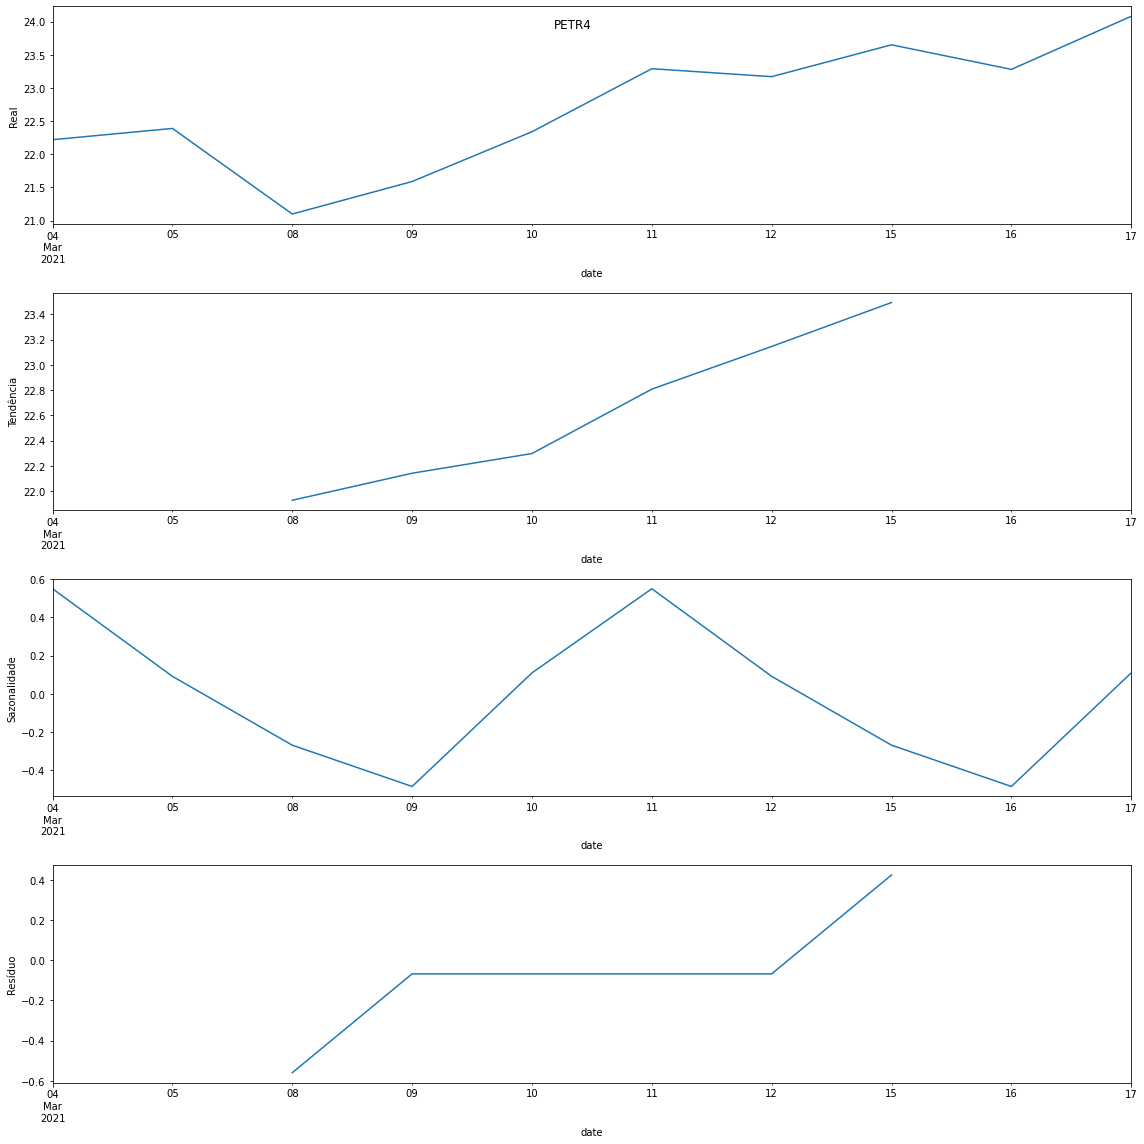

In [56]:
result = seasonal_decompose(merged.iloc[-10:]["close-PETR4.SA"], model='aditive',period=5)
fig, (ax1,ax2,ax3, ax4) = plt.subplots(4,1, figsize=(16,16))
fig.suptitle('PETR4')
result.observed.plot(ax=ax1)
ax1.set_ylabel('Real')
result.trend.plot(ax=ax2)
ax2.set_ylabel('Tendência')
result.seasonal.plot(ax=ax3)
ax3.set_ylabel('Sazonalidade')
result.resid.plot(ax=ax4)
ax4.set_ylabel('Resíduo')
plt.tight_layout()

# Models

## Arima

In [66]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import pmdarima as pm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# This will allow us to avoid a FutureWarning when plotting.
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

from warnings import catch_warnings
from warnings import filterwarnings
import warnings

warnings.simplefilter(action="ignore")

In [67]:
merged = merged.iloc[-20:]

In [68]:
train = merged.iloc[-30:-5]['close-PETR4.SA']
test = merged.iloc[-5:]['close-PETR4.SA']

In [69]:
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					rmse = evaluate_arima_model(dataset, order)
					if rmse < best_score:
						best_score, best_cfg = rmse, order
					print('ARIMA%s RMSE=%.3f' % (order,rmse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
 

In [70]:
# Starting AIC, p, and q.
best_aic = 99 * (10 ** 16)
best_p = 0
best_q = 0
# Iterating over values of p and q.
for p in range(5):
    for q in range(5):
        try:
            # Fitting an ARIMA(p, 1, q) model.
            print(f'Attempting to fit ARIMA({p}, 1, {q}) model.')
            # Instantiate ARIMA model.
            arima = ARIMA(endog = train.astype(float).dropna(), # endog = Y variable
                          order = (p, 1, q))
            # Fit ARIMA model.
            model = arima.fit()
            # Print out AIC for ARIMA(p, 1, q) model.
            print(f'The AIC for ARIMA({p},1,{q}) is: {model.aic}')
            # Is my current model's AIC better than our best_aic?
            if model.aic < best_aic:
                # If so, let's overwrite best_aic, best_p, and best_q.
                best_aic = model.aic
                best_p = p
                best_q = q
        except:
            pass
print()
print()
print('MODEL FINISHED!')
print(f'Our model that minimizes AIC on the training data is the ARIMA({best_p},1,{best_q}).')
print(f'This model has an AIC of {best_aic}.')

Attempting to fit ARIMA(0, 1, 0) model.
The AIC for ARIMA(0,1,0) is: 60.01980792647318
Attempting to fit ARIMA(0, 1, 1) model.
The AIC for ARIMA(0,1,1) is: 61.47445646702124
Attempting to fit ARIMA(0, 1, 2) model.
The AIC for ARIMA(0,1,2) is: 60.522654268156444
Attempting to fit ARIMA(0, 1, 3) model.
The AIC for ARIMA(0,1,3) is: 59.46586147693302
Attempting to fit ARIMA(0, 1, 4) model.
The AIC for ARIMA(0,1,4) is: 61.3723022690007
Attempting to fit ARIMA(1, 1, 0) model.
The AIC for ARIMA(1,1,0) is: 61.844264738264
Attempting to fit ARIMA(1, 1, 1) model.
Attempting to fit ARIMA(1, 1, 2) model.
Attempting to fit ARIMA(1, 1, 3) model.
Attempting to fit ARIMA(1, 1, 4) model.
Attempting to fit ARIMA(2, 1, 0) model.
The AIC for ARIMA(2,1,0) is: 58.70717649775955
Attempting to fit ARIMA(2, 1, 1) model.
Attempting to fit ARIMA(2, 1, 2) model.
Attempting to fit ARIMA(2, 1, 3) model.
Attempting to fit ARIMA(2, 1, 4) model.
Attempting to fit ARIMA(3, 1, 0) model.
The AIC for ARIMA(3,1,0) is: 60.6

In [71]:
model = ARIMA(endog = train.astype(float).dropna(),
              order = (2,1,0))
arima = model.fit()

forecast, stderr, conf_int = arima.forecast(len(test), alpha = 0.05)

print(f'MAE = {mean_absolute_error(test, forecast)}')

MAE = 3.2543124756276134


In [72]:
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:       D.close-PETR4.SA   No. Observations:                   14
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 -25.354
Method:                       css-mle   S.D. of innovations              1.375
Date:                Thu, 18 Mar 2021   AIC                             58.707
Time:                        08:22:30   BIC                             61.263
Sample:                    02-19-2021   HQIC                            58.471
                         - 03-10-2021                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.3607      0.182     -1.978      0.048      -0.718      -0.003
ar.L1.D.close-PETR4.SA    -0.3809      0.223     -1.709      0.088      -0.818       0.056
ar.L2.D.close-PETR4.SA    -0.7961      0.198     -4.015      0.000      -1.185      -0.407
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.2392           -1.0950j            1.1208           -0.2842
AR.2           -0.2392           +1.0950j            1.1208            0.2842
-----------------------------------------------------------------------------
"""

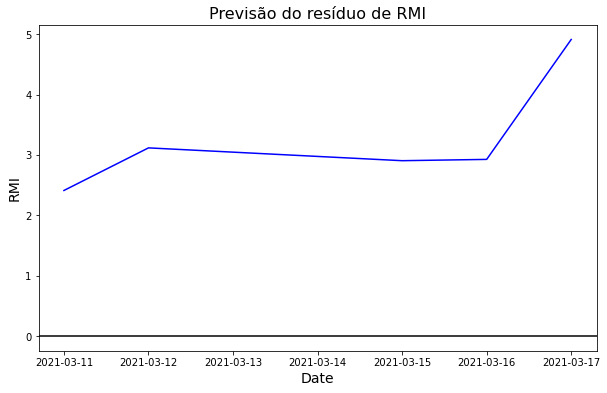

In [73]:
resid = test-forecast

plt.figure(figsize=(10,6))
plt.plot(resid,color = 'blue') 
plt.ylabel('RMI', fontsize = 14)
plt.xlabel('Date', fontsize = 14)
plt.title(label = 'Previsão do resíduo de RMI', fontsize=16) 
plt.axhline(0, color = 'k', ls = '-')
plt.show();

In [74]:
# Create traces
plt.figure(figsize=(10,6))
merged['compra'] = 23
layout = go.Layout(title="Previsão ação",xaxis=dict(title="Data"), yaxis=dict(title="Preço R$"))
fig = go.Figure(layout = layout)
fig.add_trace(go.Scatter(x=train.index, y=train, mode='lines', name='Treino'))
fig.add_trace(go.Scatter(x=test.index, y=test,mode='lines',name='Teste'))
fig.add_trace(go.Scatter(x=test.index, y=forecast,mode='lines',name='Previsto'))

fig.update_layout(autosize=False,width=1000,height=800,)

fig.show()

<Figure size 720x432 with 0 Axes>

In [75]:
train = merged.iloc[-30:]['close-PETR4.SA']
#test = merged['close-PETR4.SA'][merged.index >= '2021-02-26']

In [76]:
test = pd.DataFrame()

In [77]:
test = pd.DataFrame({'date':['2021-03-19','2021-03-20','2021-03-21','2021-03-22','2021-03-23','2021-03-24']})

In [78]:
test['date'] = pd.to_datetime(test['date'], format='%Y-%m-%d')

test = test.set_index('date')

In [79]:
test

""
date
2021-03-19
2021-03-20
2021-03-21
2021-03-22
2021-03-23
2021-03-24


In [80]:
model = ARIMA(endog = train.astype(float).dropna(),
              order = (2,1,0))
arima = model.fit()

forecast, stderr, conf_int = arima.forecast(len(test), alpha = 0.05)


In [81]:
forecast

array([23.84549632, 23.11649358, 23.15243999, 23.32117374, 22.97842989,
       22.67120631])

In [82]:
# Create traces
plt.figure(figsize=(10,6))
merged['compra'] = 23
layout = go.Layout(title="Previsão ação",xaxis=dict(title="Data"), yaxis=dict(title="Preço R$"))
fig = go.Figure(layout = layout)
fig.add_trace(go.Scatter(x=train.index, y=train, mode='lines', name='Real'))
fig.add_trace(go.Scatter(x=test.index, y=forecast,mode='lines',name='Previsto'))

fig.update_layout(autosize=False,width=1000,height=800)

layout = go.Layout(
    title="Title",
    xaxis=dict(
        title="X Label"
    ),
    yaxis=dict(
        title="Y label"
    ) ) 
#fig=go.Figure(layout=layout,data=data) 

fig.show()

<Figure size 720x432 with 0 Axes>

## Sarima

In [83]:
sarimax = SARIMAX(endog =  train.astype(float).dropna(),
                order = (0,1,0),
                 seasonal_order = (0,1,0,3)
                 )

#fit SARIMAX model
model = sarimax.fit()

In [84]:
forecast = model.forecast(len(test), alpha = 0.05)

In [85]:
forecast

2021-03-18    24.559999
2021-03-19    24.190001
2021-03-22    24.990000
2021-03-23    25.469999
2021-03-24    25.100000
2021-03-25    25.900000
Freq: B, dtype: float64

In [86]:
# Create traces
plt.figure(figsize=(10,6))
merged['compra'] = 23
layout = go.Layout(title="Previsão ação",xaxis=dict(title="Data"), yaxis=dict(title="Preço R$"))
fig = go.Figure(layout = layout)
fig.add_trace(go.Scatter(x=train.index, y=train, mode='lines', name='Real'))
fig.add_trace(go.Scatter(x=test.index, y=forecast,mode='lines',name='Previsto'))

fig.update_layout(autosize=False,width=1000,height=800,)

fig.show()

<Figure size 720x432 with 0 Axes>

In [37]:
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.66)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit()
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	rmse = sqrt(mean_squared_error(test, predictions))
	return rmse

def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					rmse = evaluate_arima_model(dataset, order)
					if rmse < best_score:
						best_score, best_cfg = rmse, order
					print('ARIMA%s RMSE=%.3f' % (order,rmse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))# load dataset
def parser(x):
	return datetime


In [38]:
train.to_csv('train.csv')

In [39]:
series = pd.read_csv('train.csv', header=0, index_col=0, parse_dates=True)

In [40]:
pd.DataFrame(series).values

array([[27.54000092],
       [27.79999924],
       [28.07999992],
       [28.44000053],
       [29.27000046],
       [27.32999992],
       [21.67000008],
       [24.05999947],
       [24.39999962],
       [23.19000053],
       [22.23999977],
       [22.        ],
       [21.98999977],
       [21.19000053],
       [22.21999931],
       [22.38999939],
       [21.10000038],
       [21.59000015],
       [22.34000015],
       [23.29000092]])

In [41]:
# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
#warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)


Best ARIMANone RMSE=inf


## Sequential model

In [42]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import lstm, time #helper libraries

In [43]:
merged.drop('close-PETR4.SA',axis=1)

,volume-PETR4.SA,high-PETR4.SA,open-PETR4.SA,low-PETR4.SA,volume-^BVSP,high-^BVSP,open-^BVSP,close-^BVSP,low-^BVSP,high-BRL=X,open-BRL=X,close-BRL=X,low-BRL=X,compra
date,,,,,,,,,,,,,,
2021-02-09,63662200.0,28.370001,28.049999,27.379999,7913500.0,119975.0,119696.0,119429.0,118246.0,5.444800,5.364300,5.364300,5.357335,23
2021-02-10,52949900.0,28.040001,27.740000,27.120001,8644600.0,119738.0,119472.0,118430.0,117970.0,5.432100,5.376600,5.376700,5.353300,23
2021-02-11,61158600.0,28.500000,28.139999,27.870001,7567400.0,120283.0,118440.0,119235.0,118440.0,5.392500,5.384900,5.384900,5.333690,23
2021-02-12,47801100.0,28.490000,27.809999,27.610001,7655900.0,119763.0,119300.0,119116.0,118163.0,5.407600,5.365400,5.365400,5.357000,23
2021-02-18,105539200.0,30.920000,30.379999,29.040001,10720600.0,120845.0,120361.0,119140.0,118515.0,5.448300,5.407808,5.409800,5.386400,23
2021-02-19,215834800.0,28.490000,28.030001,27.170000,10402800.0,119250.0,119199.0,118748.0,117867.0,5.465879,5.425500,5.425800,5.364963,23
2021-02-22,490230400.0,23.200001,22.799999,21.400000,21768700.0,118388.0,118388.0,112668.0,111650.0,5.528032,5.381800,5.380700,5.377600,23
2021-02-23,293503100.0,24.260000,23.049999,22.709999,15174900.0,115380.0,112676.0,115227.0,112667.0,5.478600,5.464800,5.463400,5.408785,23
2021-02-24,155246400.0,25.000000,24.549999,24.010000,11399300.0,116208.0,115229.0,115668.0,114668.0,5.447591,5.439500,5.439600,5.389700,23


In [44]:
X_train, X_test, y_train, y_test = train_test_split(merged.drop(['close-PETR4.SA','compra'],axis=1),merged['close-PETR4.SA'], test_size=0.30, random_state=7)

In [45]:
X_train

,volume-PETR4.SA,high-PETR4.SA,open-PETR4.SA,low-PETR4.SA,volume-^BVSP,high-^BVSP,open-^BVSP,close-^BVSP,low-^BVSP,high-BRL=X,open-BRL=X,close-BRL=X,low-BRL=X
date,,,,,,,,,,,,,
2021-03-10,111744100.0,22.340000,21.940001,21.580000,12511800.0,112928.0,111331.0,112776.0,109999.0,5.810800,5.801200,5.801500,5.668088
2021-02-22,490230400.0,23.200001,22.799999,21.400000,21768700.0,118388.0,118388.0,112668.0,111650.0,5.528032,5.381800,5.380700,5.377600
2021-03-03,185688500.0,21.889999,21.799999,20.480000,15144300.0,112398.0,111529.0,111184.0,107466.0,5.769100,5.675000,5.675100,5.668253
2021-03-11,130577500.0,23.490000,22.620001,22.610001,12092100.0,115127.0,112782.0,114984.0,112776.0,5.671500,5.671100,5.671100,5.541000
2021-02-26,159881000.0,23.420000,23.200001,21.969999,14618500.0,113466.0,112260.0,110035.0,109827.0,5.581100,5.527746,5.528025,5.490000
2021-03-04,127843200.0,22.400000,21.299999,21.120001,14221600.0,114433.0,111191.0,112690.0,111163.0,5.635400,5.616453,5.617500,5.545100
2021-02-24,155246400.0,25.000000,24.549999,24.010000,11399300.0,116208.0,115229.0,115668.0,114668.0,5.447591,5.439500,5.439600,5.389700
2021-03-08,141142800.0,22.280001,21.940001,20.959999,0.0,115202.0,115202.0,110612.0,110268.0,5.757612,5.691000,5.689500,5.650807
2021-02-25,170233000.0,25.250000,25.000000,23.100000,12466500.0,116506.0,115668.0,112256.0,111764.0,5.509500,5.403075,5.402964,5.401800


# H2O

In [131]:
import h2o
from h2o.automl import H2OAutoML
import pandas as pd
#import torch
from sklearn import datasets
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM Zulu11.41+23-CA (build 11.0.8+10-LTS, mixed mode)
  Starting server from C:\Users\lrocha\Anaconda3\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\lrocha\AppData\Local\Temp\tmplcuggcef
  JVM stdout: C:\Users\lrocha\AppData\Local\Temp\tmplcuggcef\h2o_lrocha_started_from_python.out
  JVM stderr: C:\Users\lrocha\AppData\Local\Temp\tmplcuggcef\h2o_lrocha_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,America/Sao_Paulo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.0.4
H2O_cluster_version_age:,1 month and 5 days
H2O_cluster_name:,H2O_from_python_lrocha_4bdoar
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.969 Gb
H2O_cluster_total_cores:,0
H2O_cluster_allowed_cores:,0
H2O_cluster_status:,"accepting new members, healthy"


In [148]:
predict = h2o.H2OFrame(merged[:-4].reset_index())

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [160]:
hf_train = h2o.H2OFrame(merged[:-4].reset_index())
hf_test = h2o.H2OFrame(merged[-4:].reset_index())

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [161]:
y = 'close-PETR4.SA'
X = hf_train.columns
X.remove(y)

In [163]:
aml = H2OAutoML(max_runtime_secs = 1,
                seed = 42)
aml.train(x = X, 
          y = y,
          training_frame = hf_train,
          leaderboard_frame = hf_test)

AutoML progress: |
13:43:19.649: AutoML: XGBoost is not available; skipping it.

████████████████████████████████████████████████████████| 100%


In [164]:
lb = aml.leaderboard

lb

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
GLM_1_AutoML_20210307_134319,0.236139,0.485942,0.236139,0.428049,0.0210509


In [165]:
leader_model = aml.leader

In [166]:
hf_test_predict = leader_model.predict(hf_test)

glm prediction progress: |████████████████████████████████████████████████| 100%


In [168]:
df_results = pd.DataFrame()
df_results['ground_truth'] = merged[-4:]['close-PETR4.SA'].reset_index(drop=True)
df_results['predictions'] = h2o.as_list(hf_test_predict,use_pandas=True)
df_results.head()

,ground_truth,predictions
0,22.000000,22.750685
1,21.990000,22.138231
2,21.190001,21.715690
3,22.219999,22.507589


In [ ]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x=df_results['predictions'],y=df_results['ground_truth'])
print('R2 = ',r_value*r_value)

In [ ]:
plt.scatter(x=df_results['predictions'],y=df_results['ground_truth'],s=1)
plt.xlabel('predictions',fontsize=18)
plt.ylabel('ground_truth',fontsize=18)
plt.show()

In [ ]:
plt.plot(df_results['ground_truth'])
plt.plot(df_results['predictions'])
plt.ylabel('pollution',fontsize=18)
plt.legend(['ground_truth','prediction'])
plt.show()

In [ ]:
hf_test_predict = leader_model.predict(hf_test)

df_results = pd.DataFrame()
df_results['ground_truth'] = df_test['pollution'].reset_index(drop=True)
df_results['predictions'] = h2o.as_list(hf_test_predict,use_pandas=True)

slope, intercept, r_value, p_value, std_err = stats.linregress(x=df_results['predictions'],y=df_results['ground_truth'])
print('R2 = ',r_value*r_value)

In [150]:
train, test = predict.split_frame(ratios=[.7])

x = train.columns
y = 'close-PETR4.SA'
x.remove(y)

In [152]:
aml = H2OAutoML(seed=1,
                project_name = 'predicting_PETR4',
                max_models = 5)

aml.train(x=x,
          y=y,
          training_frame=train,
          leaderboard_frame=test)



AutoML progress: |
13:29:39.584: AutoML: XGBoost is not available; skipping it.

████████████████████████████████████████████████████████| 100%


In [153]:
lb_age = h2o.automl.get_leaderboard(aml, extra_columns = 'ALL')
lb_age.head(5)

model_id,mean_residual_deviance,rmse,mse,mae,rmsle,training_time_ms,predict_time_per_row_ms
GLM_1_AutoML_20210307_132939,0.0516017,0.22716,0.0516017,0.202436,0.00817019,73,0.075033
StackedEnsemble_AllModels_AutoML_20210307_132939,0.384052,0.619719,0.384052,0.464783,0.0252833,106,0.227922
StackedEnsemble_BestOfFamily_AutoML_20210307_132939,0.384052,0.619719,0.384052,0.464783,0.0252833,106,1.16949
GBM_1_AutoML_20210307_132939,0.458922,0.677438,0.458922,0.429215,0.0279303,152,0.080044
DRF_1_AutoML_20210307_132939,0.937018,0.967997,0.937018,0.553553,0.0399509,107,0.055433


In [154]:
aml.leader.predict(test.head(5))

glm prediction progress: |████████████████████████████████████████████████| 100%


predict
28.4401
27.7219
26.9725
28.0777
28.6323


In [155]:
test.head(5)

date,high-PETR4.SA,low-PETR4.SA,close-PETR4.SA,open-PETR4.SA,volume-PETR4.SA,adjclose-PETR4.SA,high-^BVSP,low-^BVSP,close-^BVSP,open-^BVSP,volume-^BVSP,adjclose-^BVSP,high-BRL=X,low-BRL=X,close-BRL=X,open-BRL=X,volume-BRL=X,adjclose-BRL=X
2021-01-18 00:00:00,28.85,28.01,28.07,28.31,6.88557e+07,28.07,122586,120351,121242,120351,7.2231e+06,121242,5.3206,5.23596,5.2913,5.2896,0,5.2913
2021-01-21 00:00:00,28.4,27.51,27.55,28.02,4.12849e+07,27.55,120243,117785,118443,119628,8.5739e+06,118443,5.3969,5.23383,5.2905,5.2903,0,5.2905
2021-01-26 00:00:00,27.97,26.82,27,27.25,6.45146e+07,27,119167,116109,116464,117381,1.06814e+07,116464,5.4705,5.34159,5.4655,5.46379,0,5.4655
2021-01-28 00:00:00,28.45,27.31,27.76,27.32,6.7827e+07,27.76,119314,115734,119314,115882,1.20659e+07,119314,5.4541,5.38896,5.4126,5.4119,0,5.4126
2021-02-04 00:00:00,28.99,28.21,28.82,28.83,4.14441e+07,28.82,120560,118918,119261,119728,8.1007e+06,119261,5.4276,5.33668,5.352,5.35056,0,5.352


# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,mean_residual_deviance,rmse,mse,mae,rmsle,training_time_ms,predict_time_per_row_ms
GLM_1_AutoML_20210307_131235,0.0212175,0.145662,0.0212175,0.126448,0.00493827,226,0.102855
StackedEnsemble_BestOfFamily_AutoML_20210307_131235,0.14232,0.377253,0.14232,0.263029,0.0150442,122,1.2123
StackedEnsemble_AllModels_AutoML_20210307_131235,0.14232,0.377253,0.14232,0.263029,0.0150442,108,0.299022
GBM_1_AutoML_20210307_131235,0.178281,0.422233,0.178281,0.342903,0.015314,180,0.057922
DRF_1_AutoML_20210307_131235,0.230939,0.480561,0.230939,0.430421,0.0177691,141,0.0694
GBM_2_AutoML_20210307_131235,1.58261,1.25802,1.58261,0.898585,0.0479308,135,0.098466
GBM_3_AutoML_20210307_131235,1.63583,1.27899,1.63583,0.909465,0.0487035,94,0.074566


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

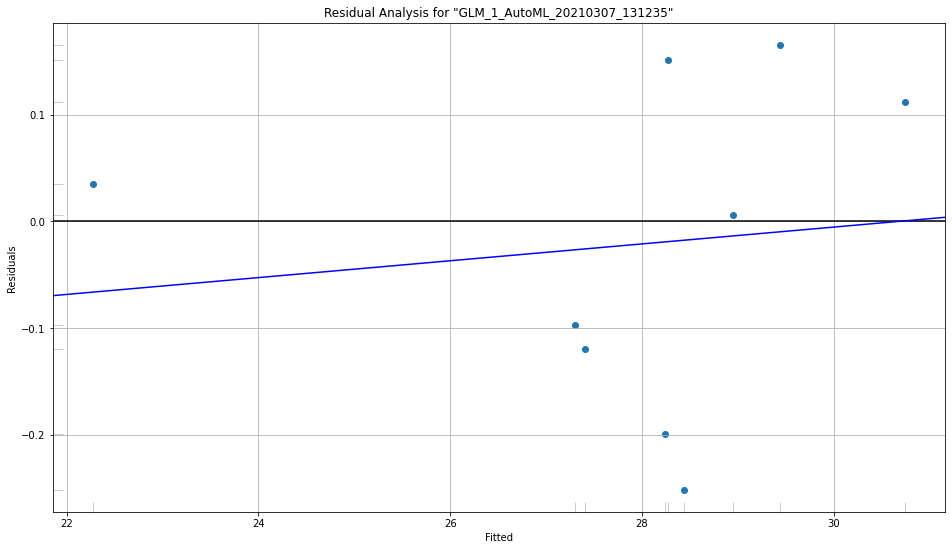

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

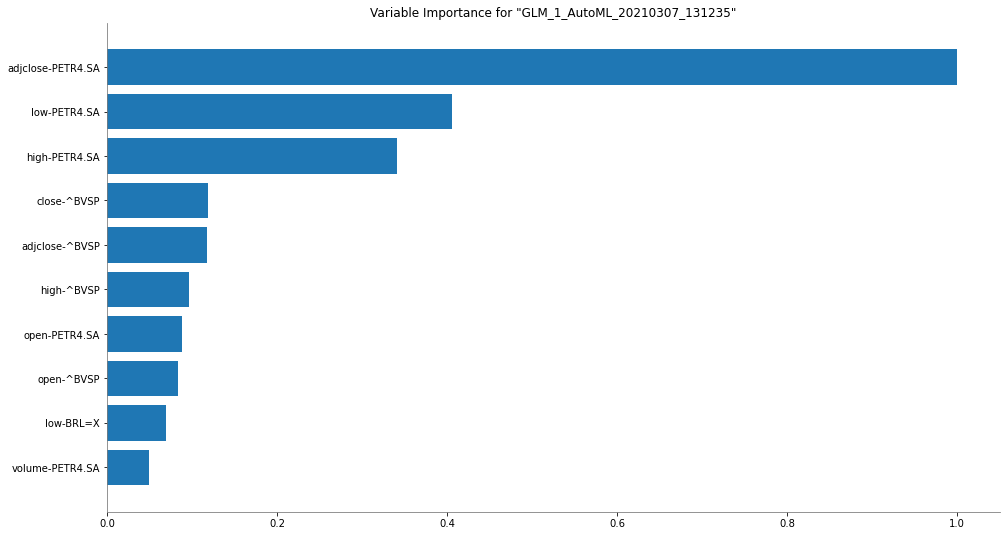

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

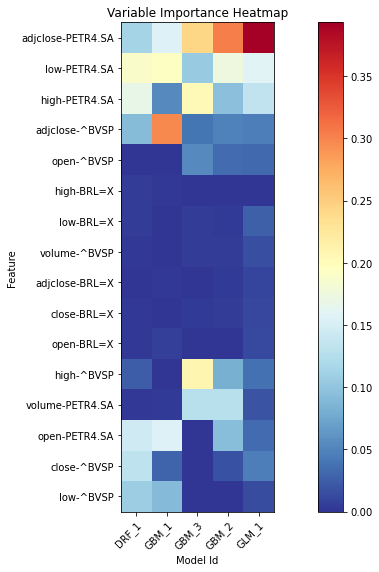

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

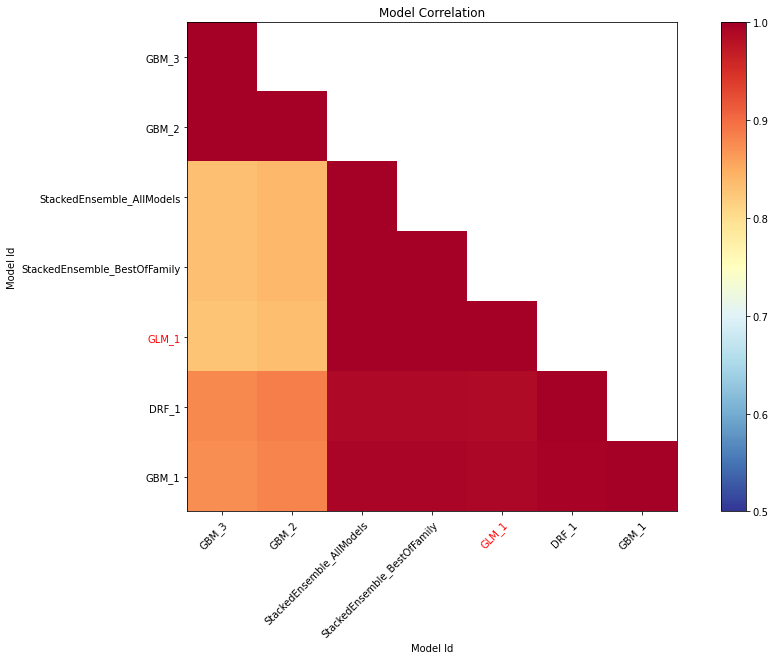

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

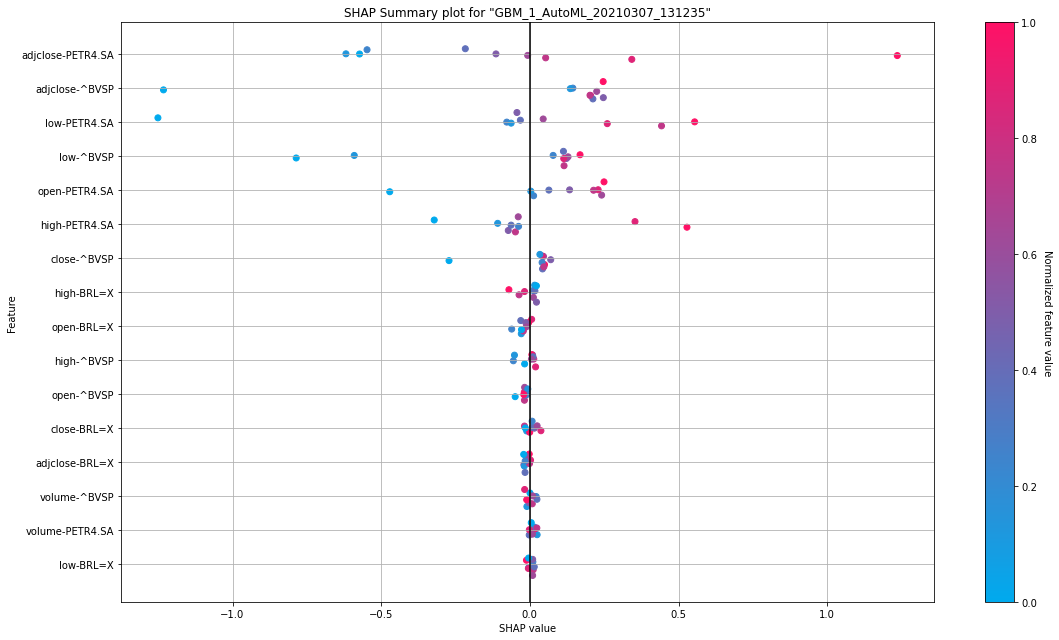

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

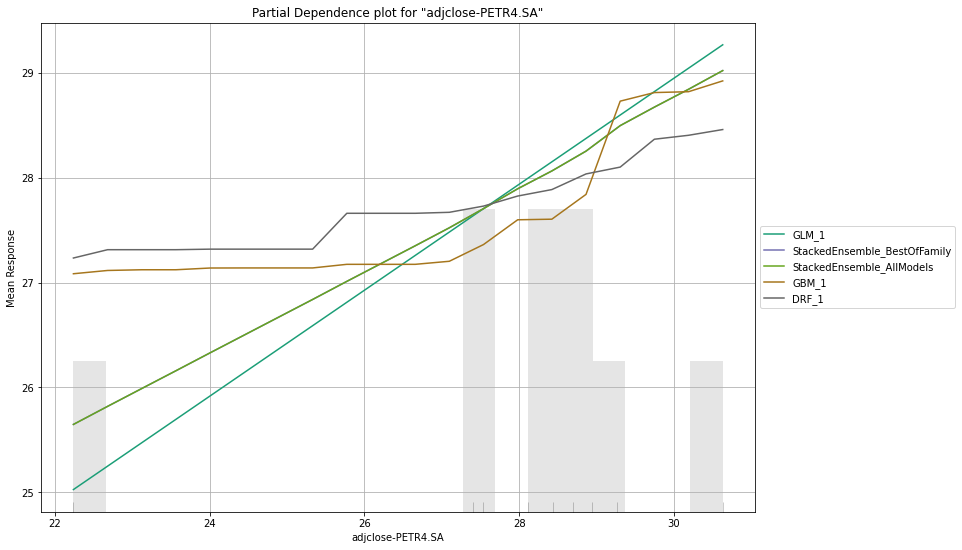

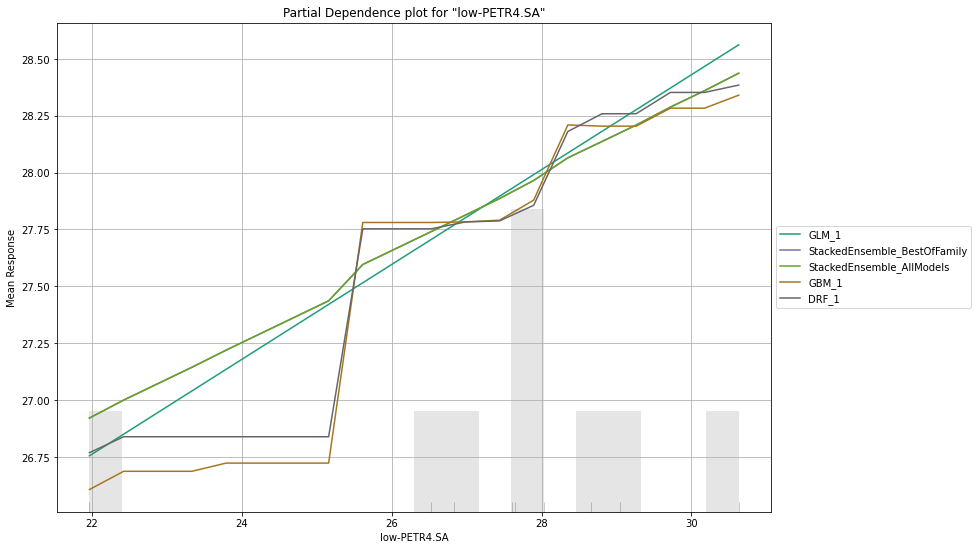

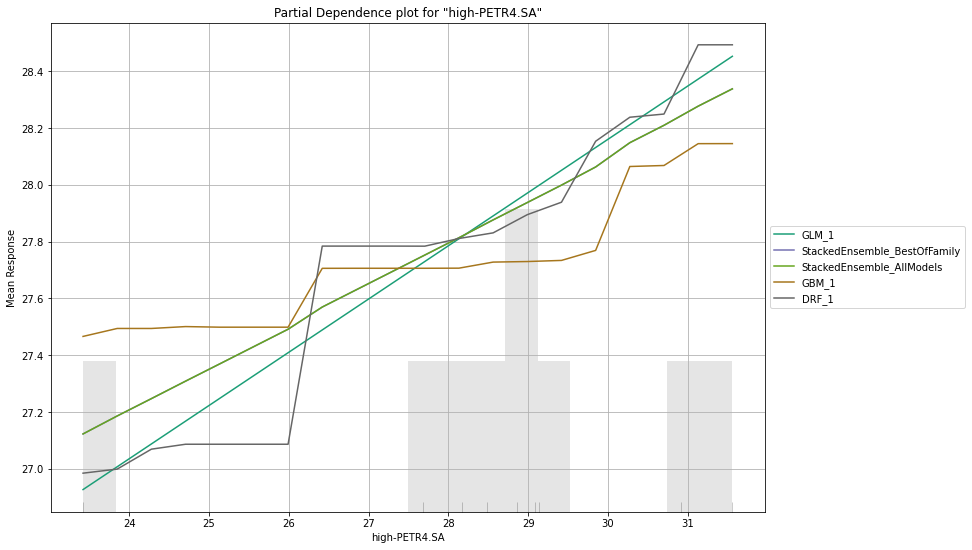

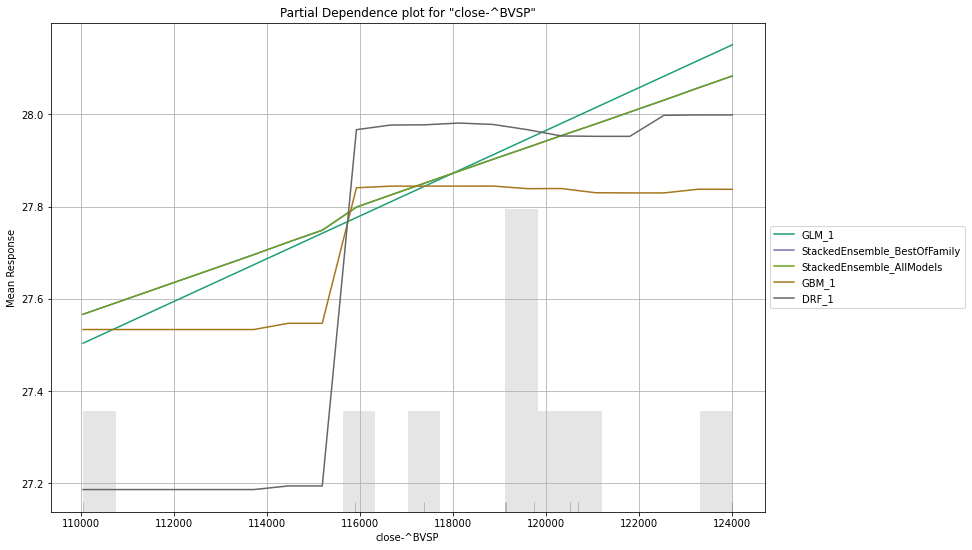

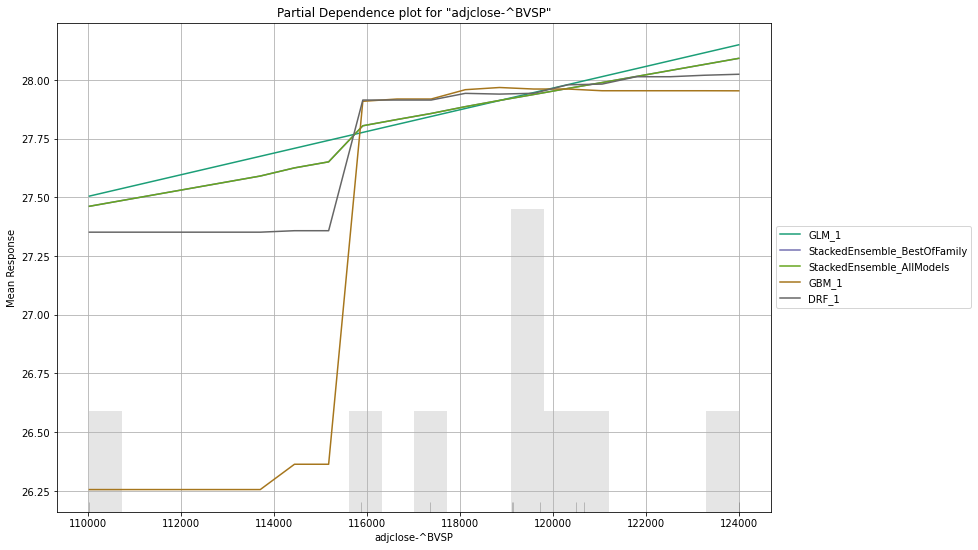

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

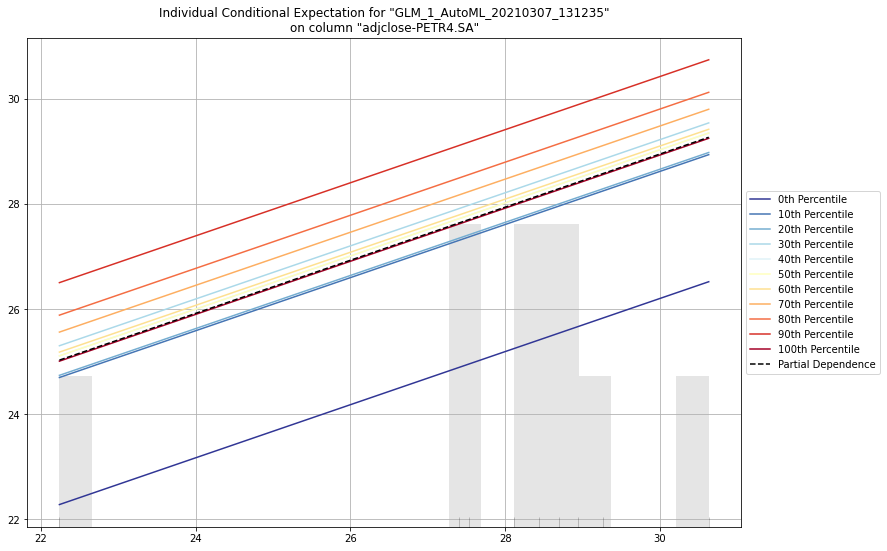

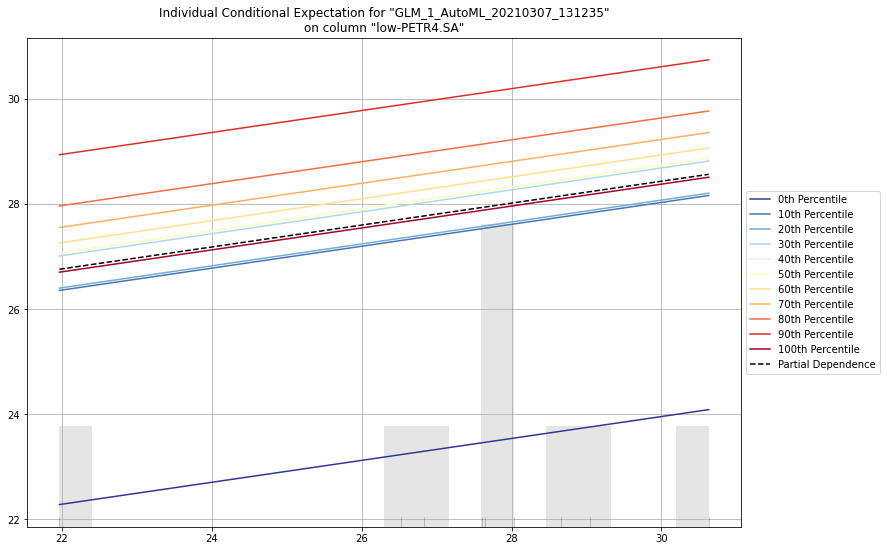

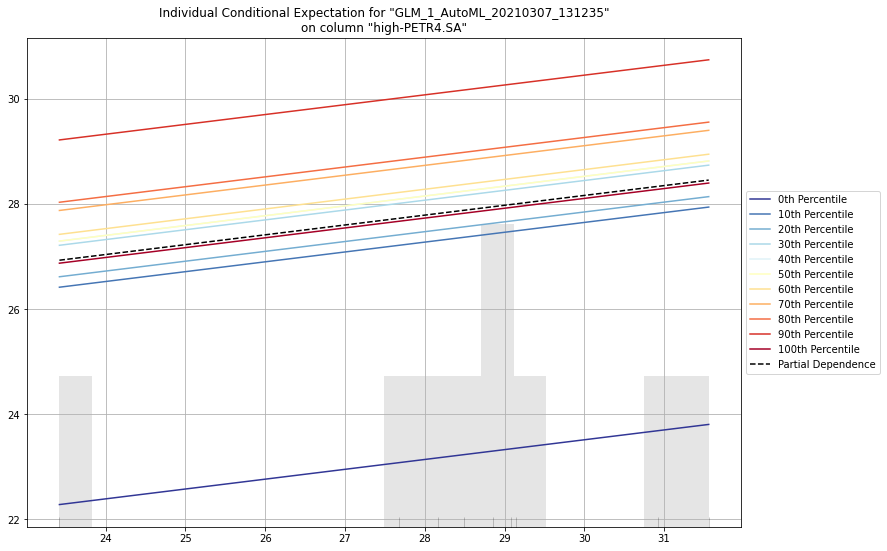

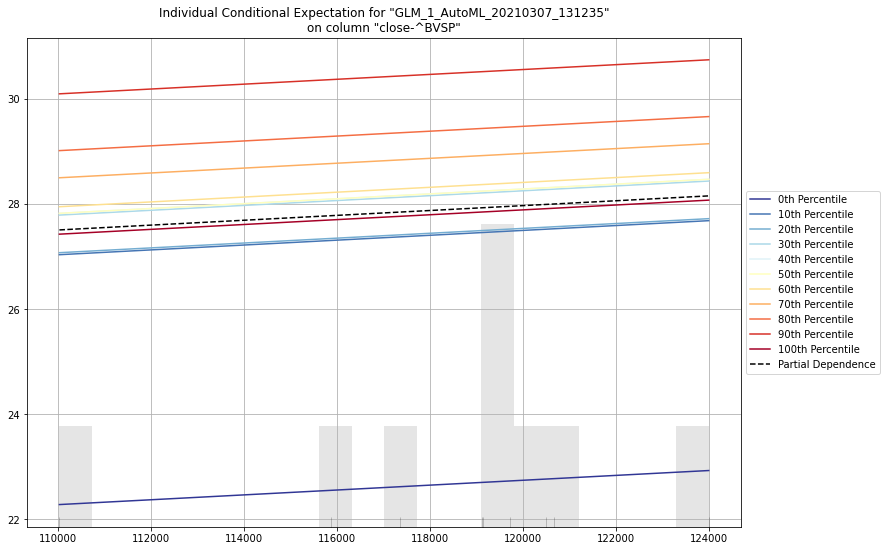

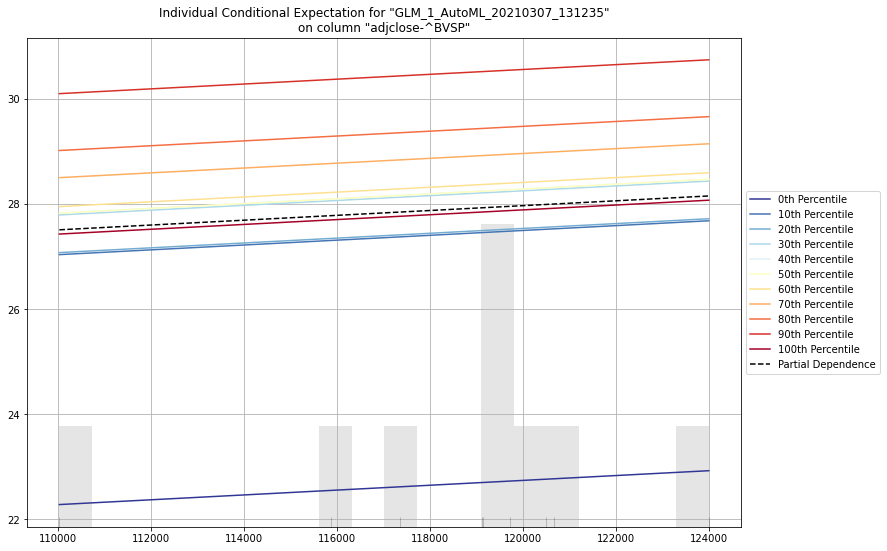

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,mean_residual_deviance,rmse,mse,mae,rmsle,training_time_ms,predict_time_per_row_ms
GLM_1_AutoML_20210307_131235,0.0212175,0.145662,0.0212175,0.126448,0.00493827,226,0.102855
StackedEnsemble_BestOfFamily_AutoML_20210307_131235,0.14232,0.377253,0.14232,0.263029,0.0150442,122,1.2123
StackedEnsemble_AllModels_AutoML_20210307_131235,0.14232,0.377253,0.14232,0.263029,0.0150442,108,0.299022
GBM_1_AutoML_20210307_131235,0.178281,0.422233,0.178281,0.342903,0.015314,180,0.057922
DRF_1_AutoML_20210307_131235,0.230939,0.480561,0.230939,0.430421,0.0177691,141,0.0694
GBM_2_AutoML_20210307_131235,1.58261,1.25802,1.58261,0.898585,0.0479308,135,0.098466
GBM_3_AutoML_20210307_131235,1.63583,1.27899,1.63583,0.909465,0.0487035,94,0.074566


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

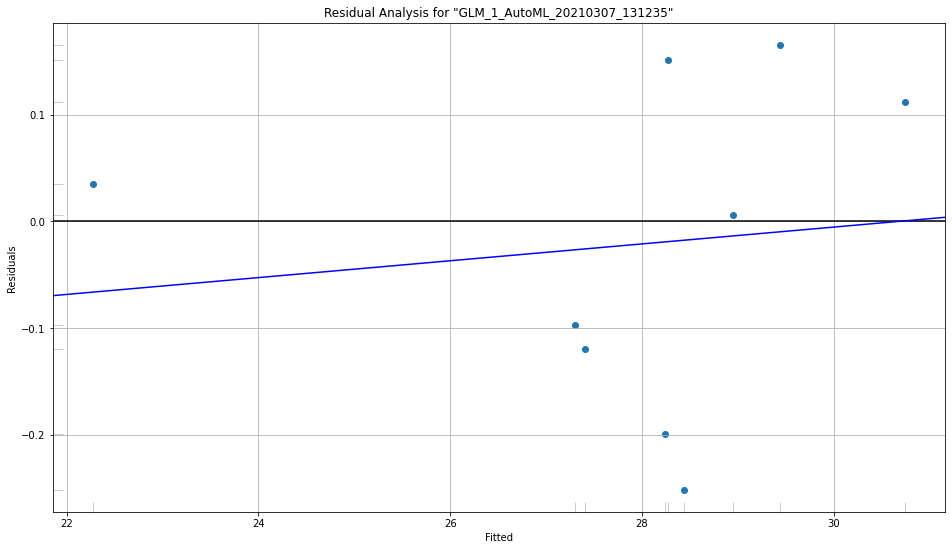

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

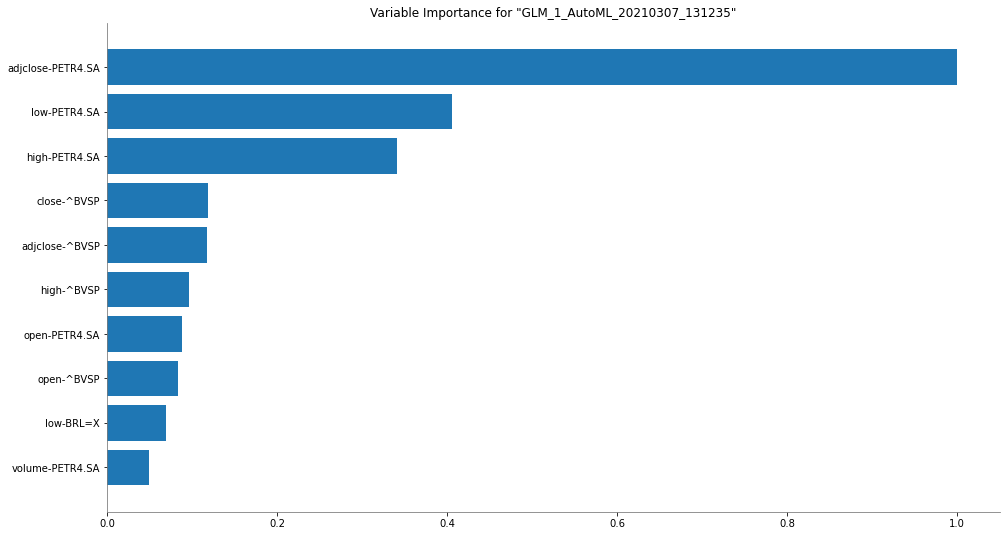

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

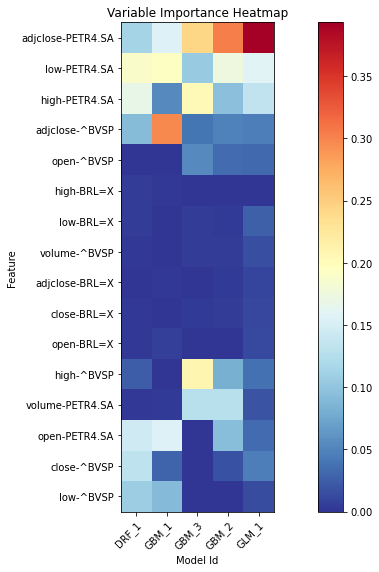

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

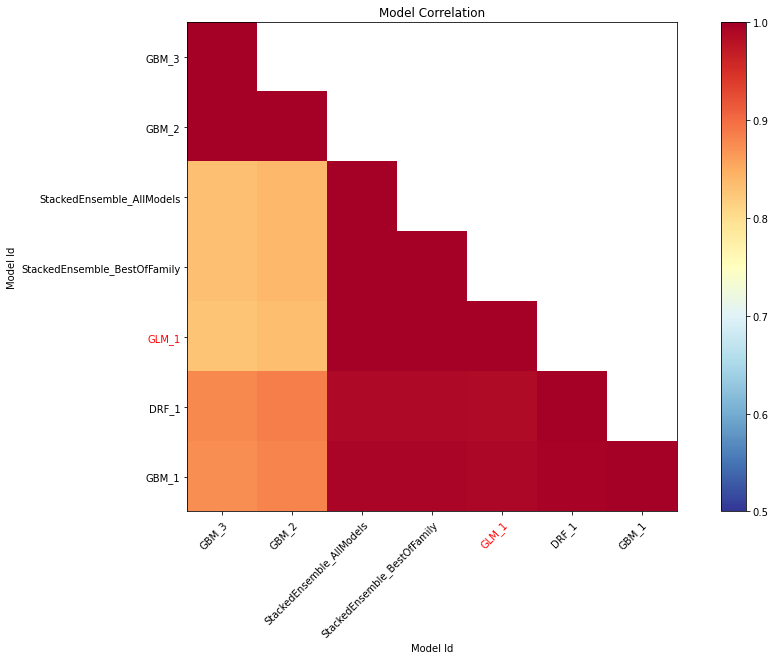

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

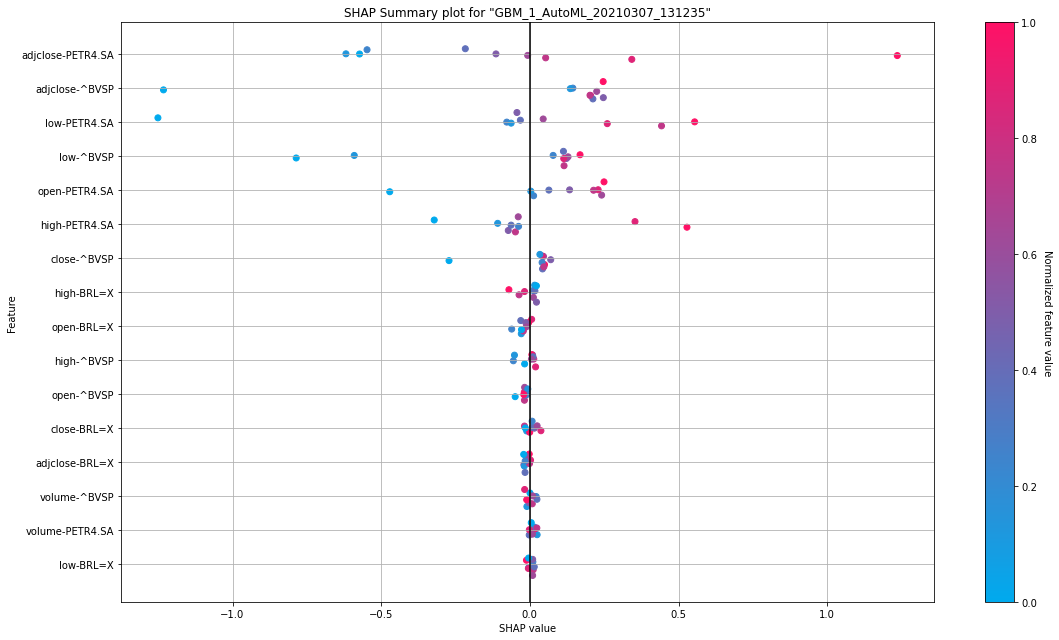

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

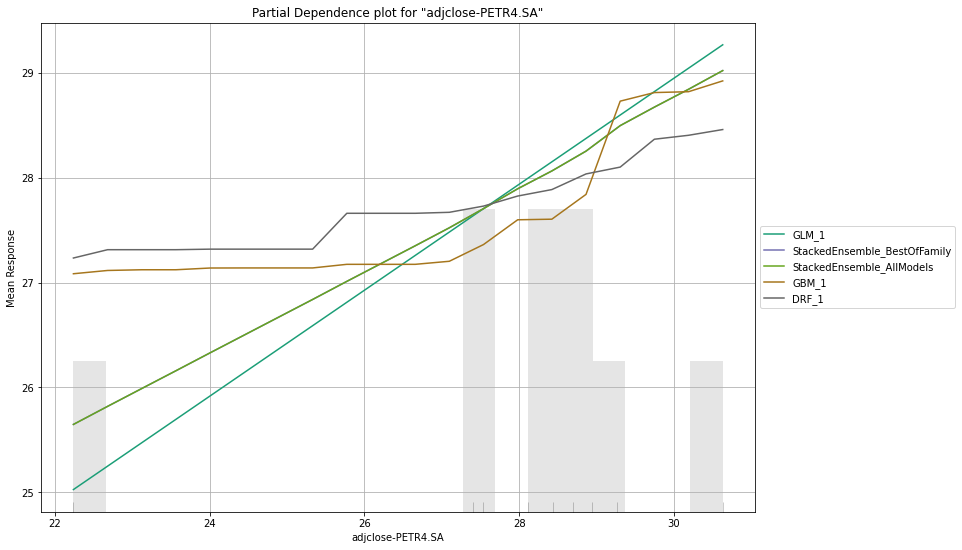

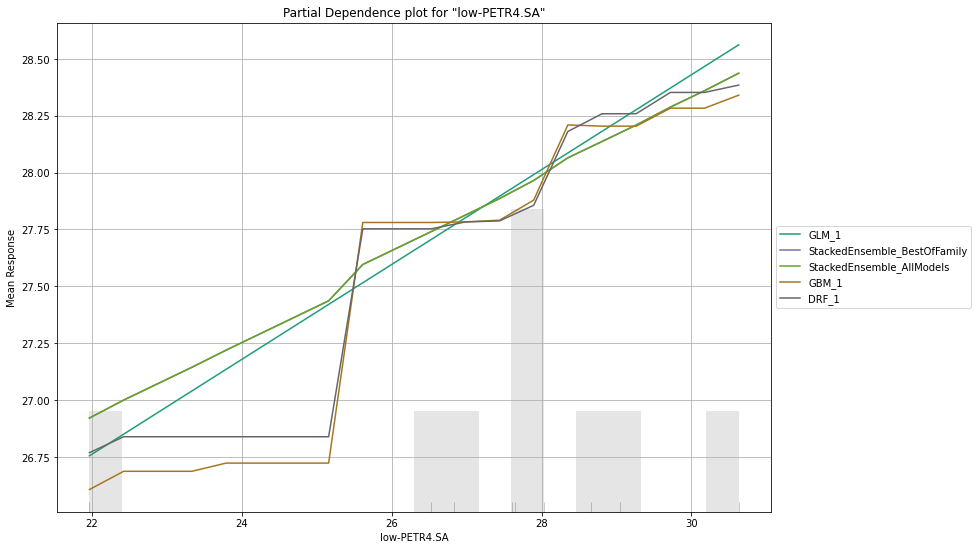

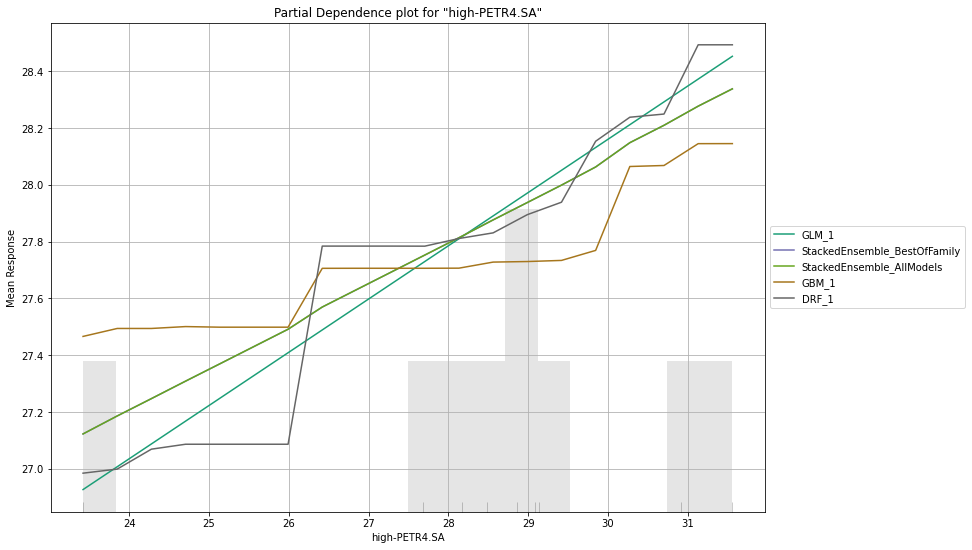

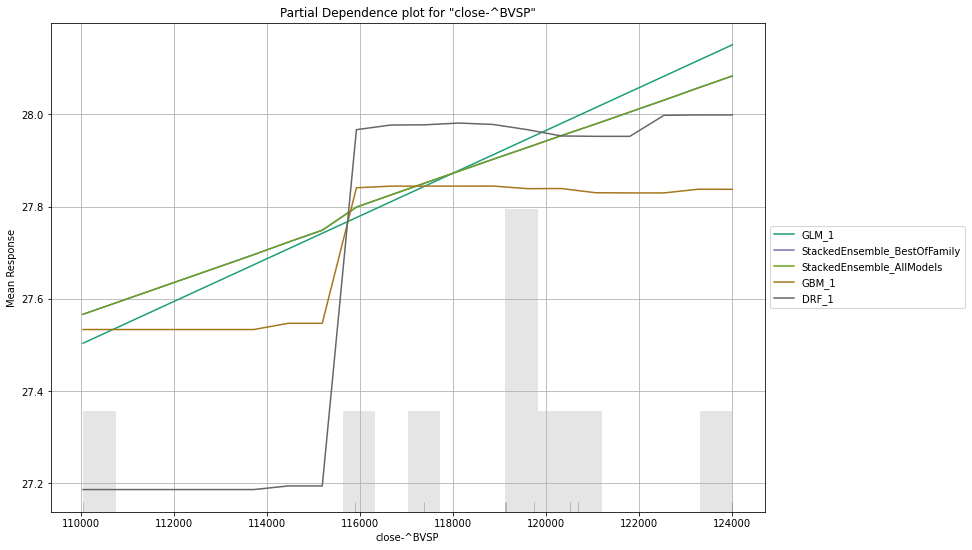

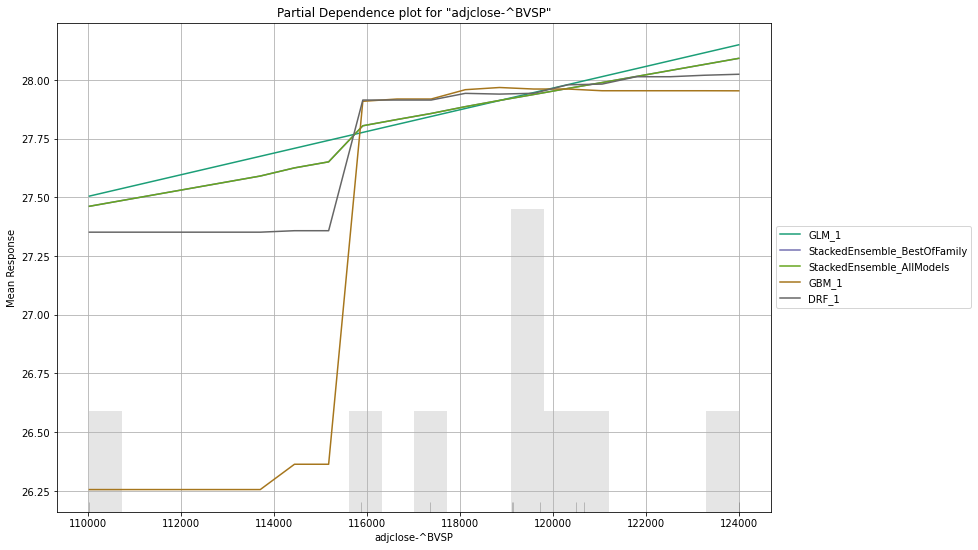

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

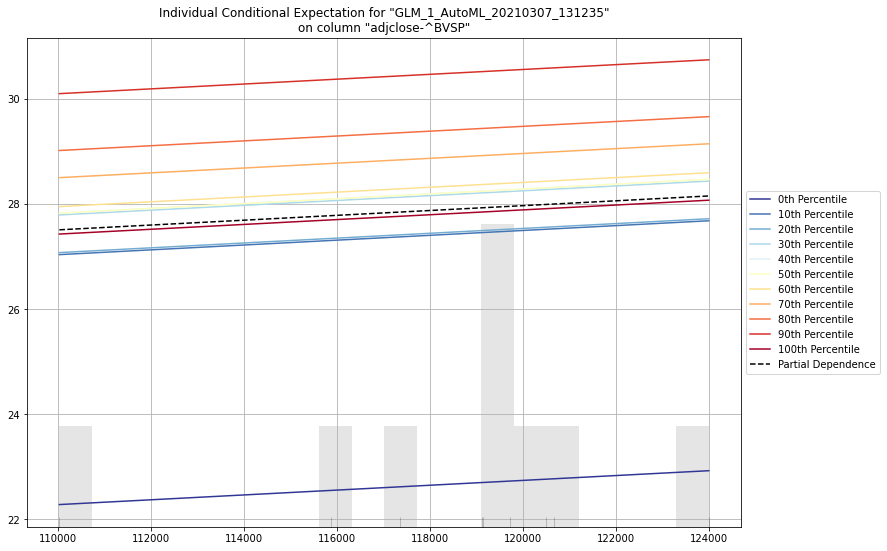

In [140]:
aml.explain(test)

In [141]:
aml.leader

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_1_AutoML_20210307_131235


GLM Model: summary


,,family,link,regularization,lambda_search,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,gaussian,identity,Ridge ( lambda = 0.03037 ),"nlambda = 30, lambda.max = 221.1, lambda.min = 0.03037, lambda.1se...",16,16,29,automl_training_py_2_sid_a545




ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.02579739691329364
RMSE: 0.16061568078271074
MAE: 0.12508039297600565
RMSLE: 0.005555776957236901
R^2: 0.9949181863267109
Mean Residual Deviance: 0.02579739691329364
Null degrees of freedom: 26
Residual degrees of freedom: 10
Null deviance: 137.06321432444977
Residual deviance: 0.6965297166589283
AIC: 13.870675244636299

ModelMetricsRegressionGLM: glm
** Reported on cross-validation data. **

MSE: 0.08759628359647575
RMSE: 0.2959666933904485
MAE: 0.23093486109585187
RMSLE: 0.01024757817629047
R^2: 0.982744460876962
Mean Residual Deviance: 0.08759628359647575
Null degrees of freedom: 26
Residual degrees of freedom: 10
Null deviance: 139.44017877778592
Residual deviance: 2.3650996571048455
AIC: 46.87722971383957

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.19034077,0.09120889,0.23947081,0.3157679,0.07535355,0.16874613,0.15236542
1,mean_residual_deviance,0.067450635,0.05844909,0.089231096,0.15826878,0.008298982,0.043524835,0.03792949
2,mse,0.067450635,0.05844909,0.089231096,0.15826878,0.008298982,0.043524835,0.03792949
3,null_deviance,27.888035,13.709973,23.024027,29.79363,10.99083,48.814144,26.817547
4,r2,0.98533523,0.01239993,0.97635263,0.9680096,0.99422663,0.9953544,0.99273294
5,residual_deviance,0.38675317,0.36247802,0.53538656,0.9496127,0.04149491,0.21762419,0.18964745
6,rmse,0.23820512,0.11569873,0.29871574,0.3978301,0.09109875,0.20862606,0.19475494
7,rmsle,0.008272796,0.0037939965,0.00978831,0.013574199,0.0032126533,0.0072764824,0.007512335



Scoring History: 


,,timestamp,duration,iteration,lambda,predictors,deviance_train,deviance_test,deviance_xval,deviance_se,alpha,training_rmse,training_deviance,training_mae,training_r2
0,,2021-03-07 13:12:36,0.000 sec,1,",22E3",17,4.698045,NaN,4.911616,1.196072,0.0,0.160616,0.0257974,0.12508,0.994918
1,,2021-03-07 13:12:36,0.001 sec,2,",16E3",17,4.568582,NaN,4.802408,1.173653,0.0,,,,
2,,2021-03-07 13:12:36,0.002 sec,3,",12E3",17,4.400453,NaN,4.659181,1.144186,0.0,,,,
3,,2021-03-07 13:12:36,0.003 sec,4,",85E2",17,4.185905,NaN,4.474066,1.105976,0.0,,,,
4,,2021-03-07 13:12:36,0.004 sec,5,",62E2",17,3.918949,NaN,4.239655,1.057403,0.0,,,,
5,,2021-03-07 13:12:36,0.005 sec,6,",45E2",17,3.597138,NaN,3.950746,0.997189,0.0,,,,
6,,2021-03-07 13:12:36,0.005 sec,7,",33E2",17,3.224147,NaN,3.606769,0.924975,0.0,,,,
7,,2021-03-07 13:12:36,0.007 sec,8,",24E2",17,2.811907,NaN,3.214207,0.841742,0.0,,,,
8,,2021-03-07 13:12:36,0.007 sec,9,",17E2",17,2.380524,NaN,2.788210,0.750228,0.0,,,,
9,,2021-03-07 13:12:36,0.008 sec,10,",13E2",17,1.956577,NaN,2.351827,0.654724,0.0,,,,



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,adjclose-PETR4.SA,1.160900,1.000000,0.393182
1,low-PETR4.SA,0.471519,0.406167,0.159698
2,high-PETR4.SA,0.395989,0.341105,0.134116
3,close-^BVSP,0.137413,0.118368,0.046540
4,adjclose-^BVSP,0.136689,0.117744,0.046295
5,high-^BVSP,0.111508,0.096053,0.037766
6,open-PETR4.SA,0.102310,0.088130,0.034651
7,open-^BVSP,0.096418,0.083055,0.032656
8,low-BRL=X,0.080332,0.069198,0.027207
9,volume-PETR4.SA,0.057849,0.049831,0.019593


# Individual Conditional Expectation

> Individual conditional expectations (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response for a given row. ICE plot is similar to partial dependence plot (PDP), PDP shows the average effect of a feature while ICE plot shows the effect for a single instance.

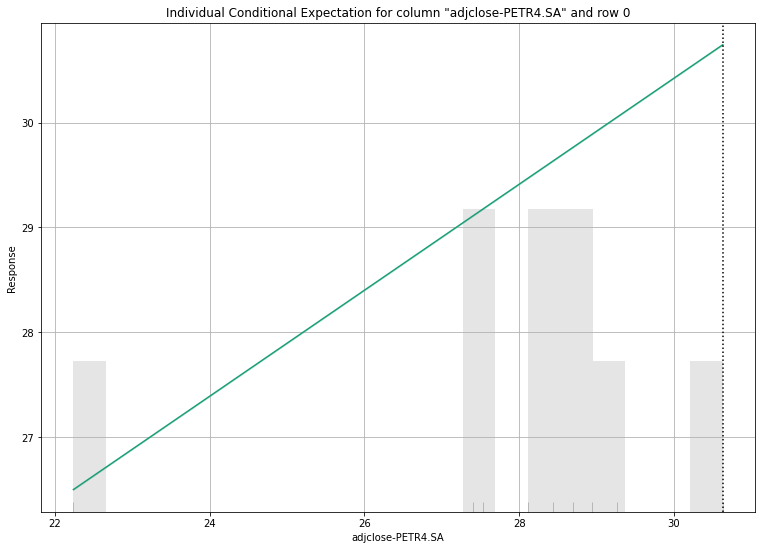

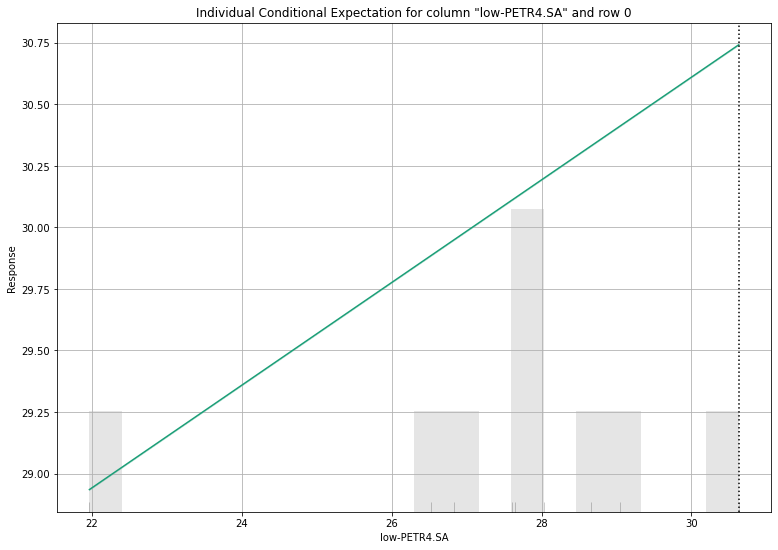

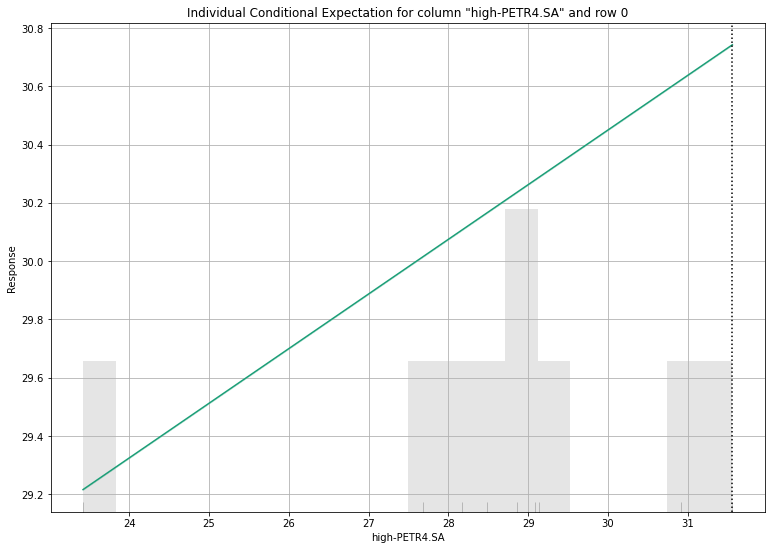

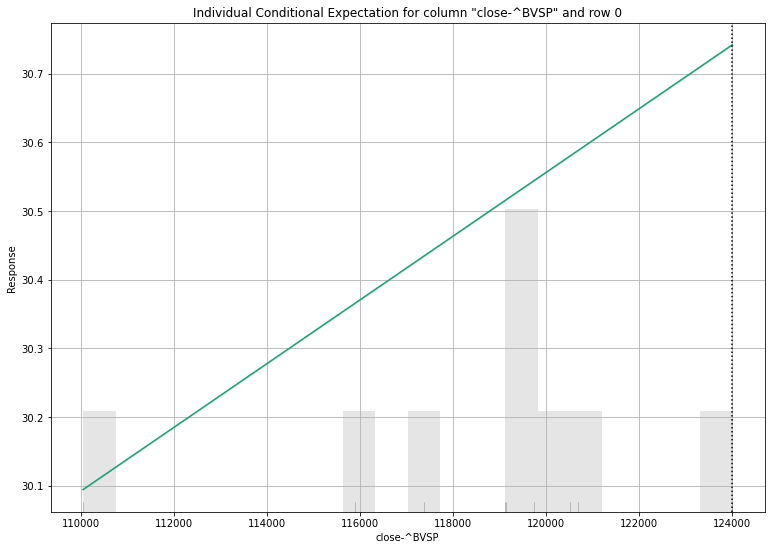

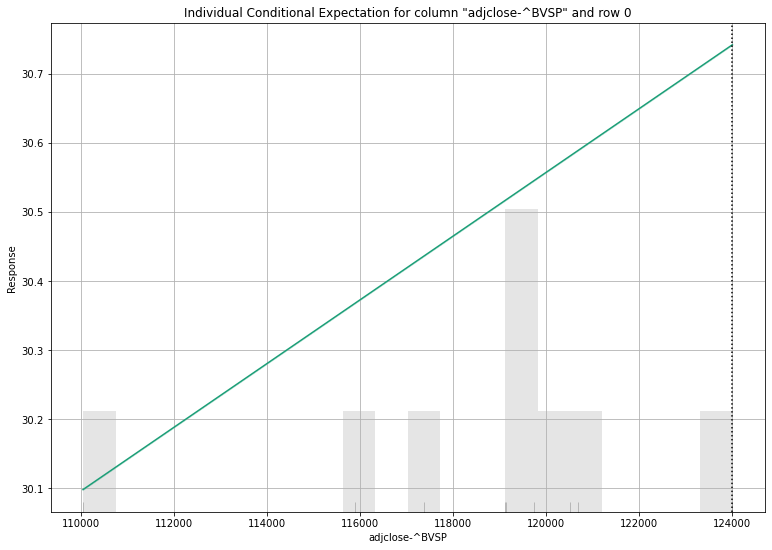

# Individual Conditional Expectation

> Individual conditional expectations (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response for a given row. ICE plot is similar to partial dependence plot (PDP), PDP shows the average effect of a feature while ICE plot shows the effect for a single instance.

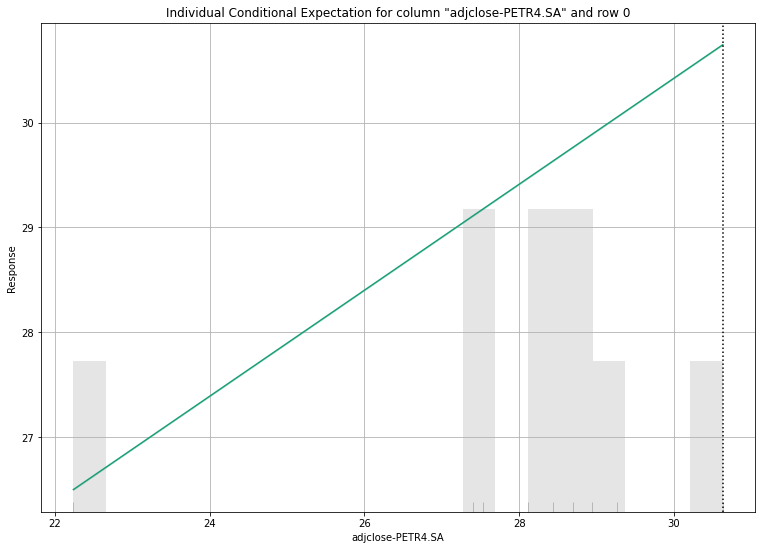

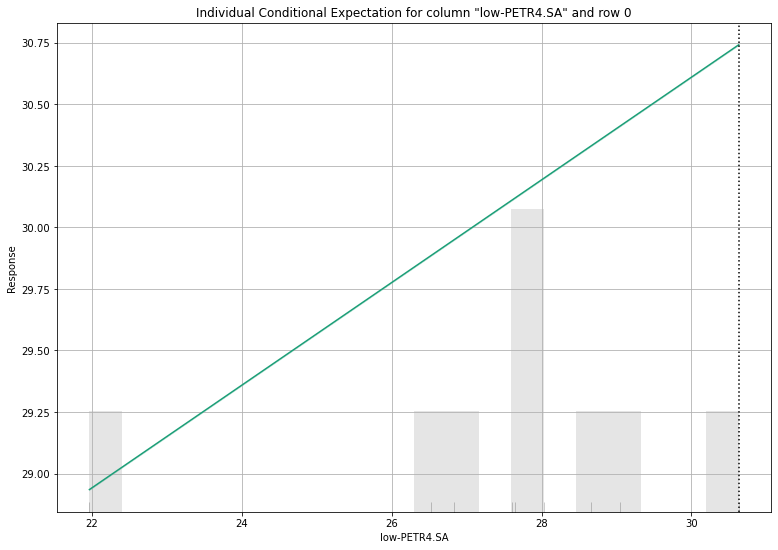

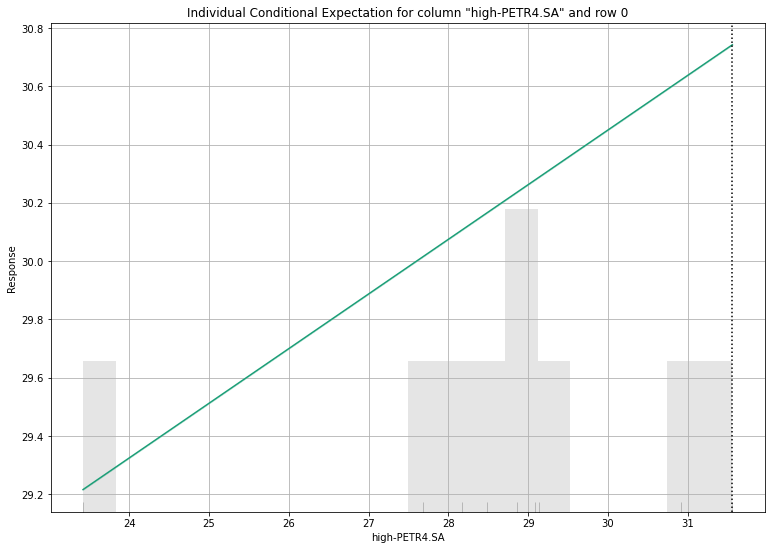

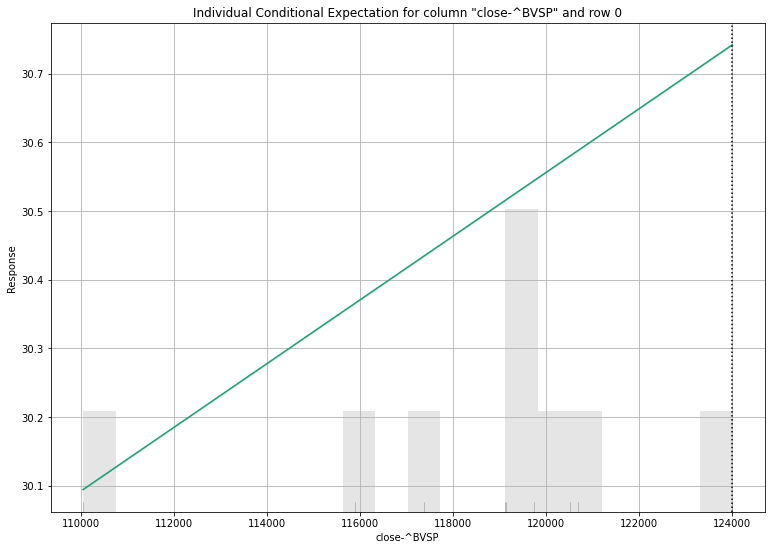

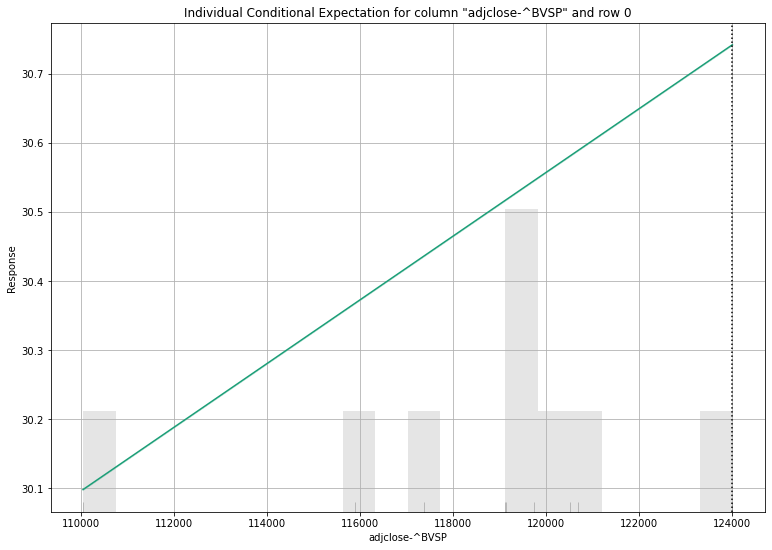

In [142]:
aml.leader.explain_row(test, row_index=0)

In [ ]:
h2o.H2OFrame(df_2020.drop('class',axis=1))